In [1]:
import matplotlib.pyplot as plt
import numpy as np 
from keras.layers import Conv2D, MaxPooling2D, Dense, Input,Flatten
from keras.models import *
from keras.utils import to_categorical
import keras
from emnist import list_datasets
import collections

Using TensorFlow backend.


In [0]:
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

In [2]:
from emnist import extract_training_samples
x_train, y_train = extract_training_samples('letters')

from emnist import extract_test_samples
x_test, y_test = extract_test_samples('letters')

In [0]:
classes = ["None",'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

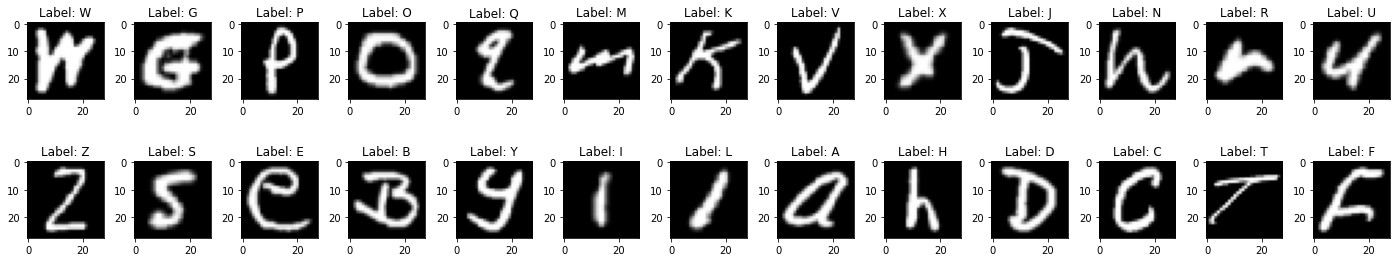

In [4]:
sd = []
x = []
classes2 = []
for i in range (y_train.shape[0]):
    if y_train[i] not in sd:
        sd.append(y_train[i])
        x.append(i)
        classes2.append(classes[y_train[i]])   
        
num_row = 2
num_col = 13
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(26):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[x[i]], cmap='gray')
    ax.set_title('Label: {}'.format(classes2[i]))
plt.tight_layout()
plt.show()

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

x_train = x_train.reshape((-1, 28, 28,1))
x_test = x_test.reshape((-1,28,28,1))

In [0]:
y_train_e = to_categorical(y_train)
y_test_e = to_categorical(y_test)

In [0]:
model = Sequential([
    Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2,2)),   
    Flatten(),    
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax')
])

In [0]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

In [0]:
model.fit(
    x_train,y_train_e,batch_size=1024,epochs=50
) 

Epoch 1/50
124800/124800 [==============================] - 16s 125us/step - loss: 1.1107 - accuracy: 0.6668
Epoch 2/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.3593 - accuracy: 0.8840
Epoch 3/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.2745 - accuracy: 0.9106
Epoch 4/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.2338 - accuracy: 0.9226
Epoch 5/50
124800/124800 [==============================] - 8s 65us/step - loss: 0.2097 - accuracy: 0.9299
Epoch 6/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.1928 - accuracy: 0.9348
Epoch 7/50
124800/124800 [==============================] - 8s 65us/step - loss: 0.1773 - accuracy: 0.9393
Epoch 8/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.1645 - accuracy: 0.9437
Epoch 9/50
124800/124800 [==============================] - 8s 66us/step - loss: 0.1534 - accuracy: 0.9461
Epoch 10/50
124800/124800 [========

In [0]:
print("Loss, Accuracy = ",model.evaluate(x_test,y_test_e))

20800/20800 [==============================] - 8s 377us/step
Loss, Accuracy =  [0.4725997661532922, 0.9308173060417175]


In [0]:
model.save("model.h5")

If you're using the default **model.h5** run the cells below from drawing and predictions.

In [4]:
from keras.models import *
import numpy as np
import cv2 

model = load_model("models/model.h5")

In [5]:
classes = ['None','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [36]:
run = False
x1,y1 = -1,-1
follow = 25
img = np.zeros((450,450,1))

def predict():
    img = cv2.imread("Image.jpg")
    blur = cv2.GaussianBlur(img,(5,5),0)
    img = cv2.resize(blur, (28,28),  interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    return classes[model.predict(gray.reshape(-1,28,28,1)).argmax()]

def draw(event, x, y, flag, params):
    global run,x1,y1,img,follow
    if event == cv2.EVENT_LBUTTONDOWN:
        run = True
        ix, iy = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if run == True:
            cv2.circle(img, (x,y), 20, (255,255,255), -1)
    
    elif event == cv2.EVENT_LBUTTONUP:
        run = False
        cv2.circle(img, (x,y), 20, (255,255,255), -1)
        gray = cv2.imwrite("Image.jpg",img)
        result = predict()
        result = 'Result : {}'.format(result)
        cv2.putText(img, org=(25,follow), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, text= result, color=(255,0,0), thickness=1)
        follow += 25
    elif event == cv2.EVENT_RBUTTONDOWN:
        img = np.zeros((512,512,1))
        follow = 25

cv2.namedWindow('image')
cv2.setMouseCallback('image', draw)


while True:    
    cv2.imshow("image", img)
   
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()